In [16]:
import pandas as pd
import mne
import os
import numpy as np
from mne.time_frequency import tfr_morlet

In [6]:
ROOT_preproc='/data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/'
list_subs=os.listdir(ROOT_preproc)

In [9]:
preproc_cue_eps={}
preproc_probe_eps={}
for s in list_subs:
    cue=mne.read_epochs(ROOT_preproc+s+'/'+'cue-epo.fif')
    probe=mne.read_epochs(ROOT_preproc+s+'/'+'probe events-epo.fif')
    preproc_cue_eps[s]=cue
    preproc_probe_eps[s]=probe

Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/224/cue-epo.fif ...
    Found the data of interest:
        t =   -1300.78 ...    1000.00 ms
        0 CTF compensation matrices available
659 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 15 columns
0 projection items activated
Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/224/probe events-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5400.39 ms
        0 CTF compensation matrices available
658 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 15 columns
0 projection items activated
Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/214/cue-epo.fif ...
    Found the data of interest:
        t =   -1300.78 ...    1000.00 ms
        0 CTF compensation matrices available
592 matching events found
Applying baseline correction (mode:

In [10]:
preproc_cue_eps

{'224': <EpochsFIF  |   659 events (all good), -1.30078 - 1 sec, baseline [-1.30078, -0.3], ~385.5 MB, data loaded, with metadata,
  'disLongCue_trig': 109
  'disShortCue_trig': 110
  'neutLongCue_trig': 110
  'neutShortCue_trig': 110
  'tarLongCue_trig': 110
  'tarShortCue_trig': 110>,
 '214': <EpochsFIF  |   592 events (all good), -1.30078 - 1 sec, baseline [-1.30078, -0.3], ~346.3 MB, data loaded, with metadata,
  'disLongCue_trig': 99
  'disShortCue_trig': 100
  'neutLongCue_trig': 98
  'neutShortCue_trig': 98
  'tarLongCue_trig': 98
  'tarShortCue_trig': 99>,
 '211': <EpochsFIF  |   594 events (all good), -1.30078 - 1 sec, baseline [-1.30078, -0.3], ~347.5 MB, data loaded, with metadata,
  'disLongCue_trig': 98
  'disShortCue_trig': 98
  'neutLongCue_trig': 100
  'neutShortCue_trig': 99
  'tarLongCue_trig': 99
  'tarShortCue_trig': 100>,
 '206': <EpochsFIF  |   597 events (all good), -1.30078 - 1 sec, baseline [-1.30078, -0.3], ~349.2 MB, data loaded, with metadata,
  'disLongCue_

In [14]:
example=preproc_cue_eps['214']

In [19]:
freqs=np.arange(.5,38.,2.)
n_cycles = freqs / 2.


tfr_disLongCue=mne.time_frequency.tfr_morlet(example['disLongCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)

/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


In [36]:
print(freqs)
print(len(freqs))

[ 0.5  2.5  4.5  6.5  8.5 10.5 12.5 14.5 16.5 18.5 20.5 22.5 24.5 26.5
 28.5 30.5 32.5 34.5 36.5]
19


In [74]:
#tfr_disLongCue.plot(vmin=-15,vmax=15)

In [61]:
tfr_disLongCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
#tfr_disLongCue.plot_topo(vmin=-10,vmax=10)
tfr_disLongCue_frontals=tfr_disLongCue.copy().pick_channels(['F1','Fz','F2','FC1','FCz','FC2'])

Applying baseline correction (mode: zscore)


No baseline correction applied


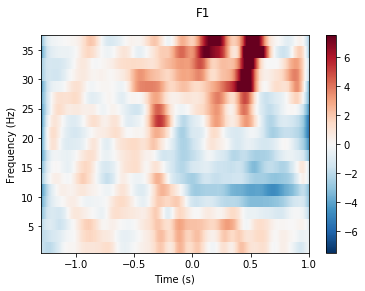

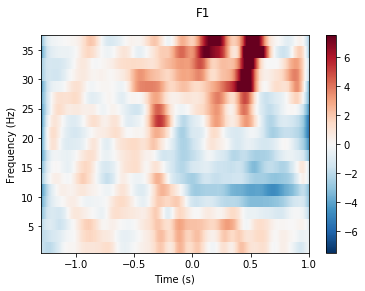

In [69]:
tfr_disLongCue_frontals.plot(picks='all',vmin=-7.50,vmax=7.5)

In [71]:
#tfr_disLongCue_frontals_avged=tfr_disLongCue_frontals.data.mean(axis=0)

In [72]:
tfr_disLongCue.data.shape

(64, 19, 590)

In [73]:
#tfr_disLongCue_frontals.data.shape

In [68]:
tfr_disLongCue_posts=tfr_disLongCue.copy().pick_channels(['P1','Pz','P2','P3','P4','PO3','PO4','POz'])

No baseline correction applied


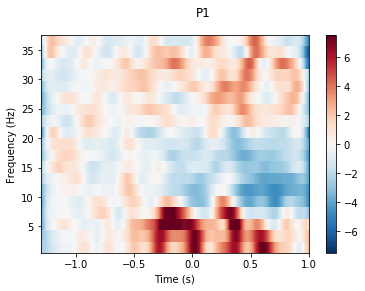

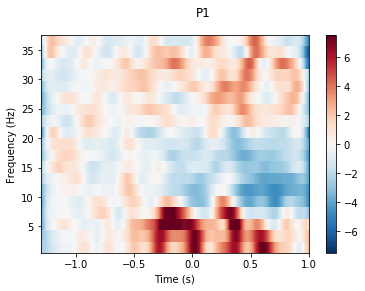

In [70]:
tfr_disLongCue_posts.plot(picks='all',vmin=-7.50,vmax=7.5)

In [84]:
#tfr_disShortCue=mne.time_frequency.tfr_morlet(example['disShortCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
#                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
#tfr_disShortCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))

In [85]:
#dislongMinusShort=tfr_disLongCue-tfr_disShortCue

#dislongMinusShort.plot(vmin=-10,vmax=10,picks=['P1','Pz','P2','P3','P4','PO3','PO4','POz'])

In [106]:
tfr_neutLongCue=mne.time_frequency.tfr_morlet(example['neutLongCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
tfr_neutLongCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))

disMinusNeut_longCue=tfr_disLongCue-tfr_neutLongCue
#disMinusNeut_longCue.plot(vmin=-7,vmax=7,picks=['P1','Pz','P2','P3','P4','PO3','PO4','POz'])
#disMinusNeut_longCue.plot(vmin=-7,vmax=7,picks=['F1','Fz','F2','FC1','FCz','FC2'])

Applying baseline correction (mode: zscore)


# Plotting ea sub

## Contrast ([distractor cue, long SOA] - [neutral cue, long SOA])
### Timing of the epochs: -500 is the onset of the grey placeholders, 0 is the onset of the colored cues for either 100ms or 1000ms





PLOTTING SUB 224
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


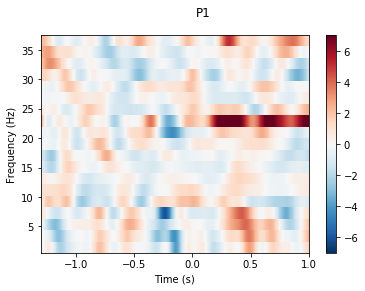

Frontal Chs:
No baseline correction applied


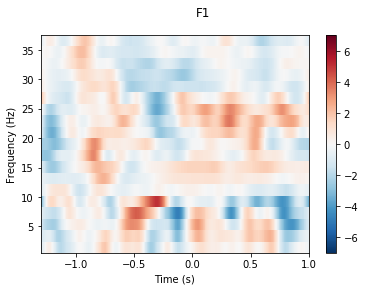





PLOTTING SUB 214
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


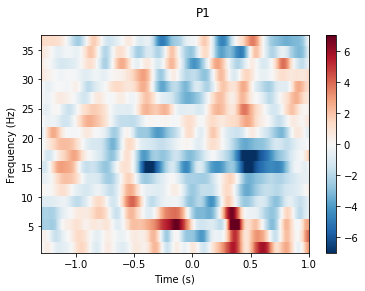

Frontal Chs:
No baseline correction applied


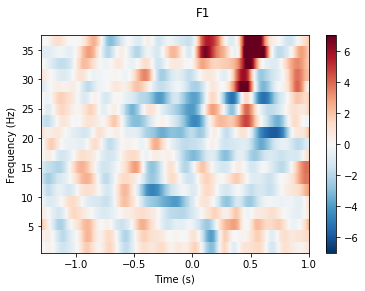





PLOTTING SUB 211
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


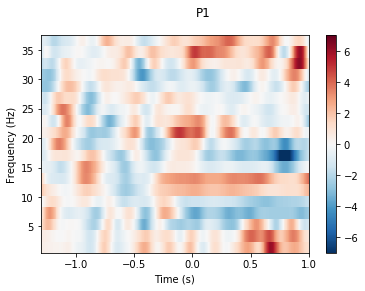

Frontal Chs:
No baseline correction applied


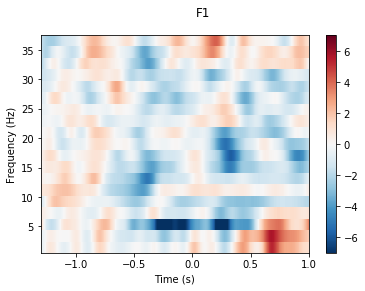





PLOTTING SUB 206
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


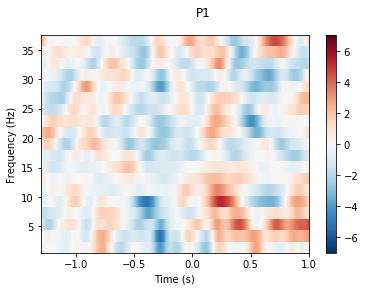

Frontal Chs:
No baseline correction applied


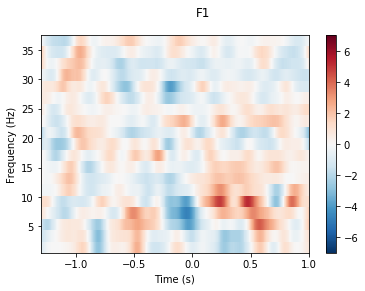





PLOTTING SUB 225
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


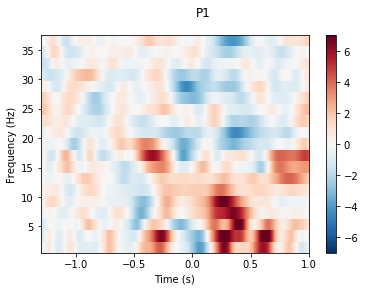

Frontal Chs:
No baseline correction applied


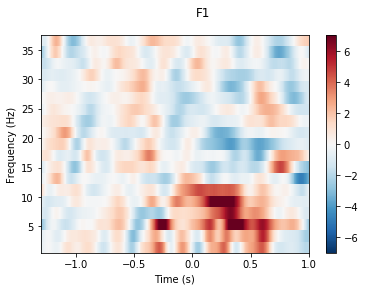





PLOTTING SUB 226
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


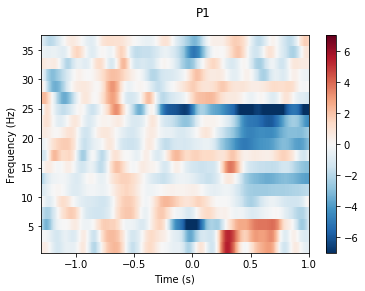

Frontal Chs:
No baseline correction applied


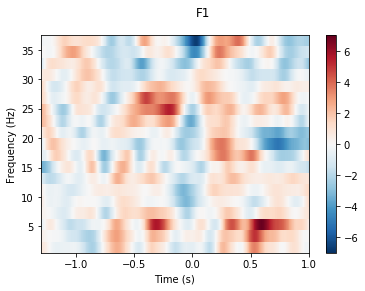





PLOTTING SUB 233
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


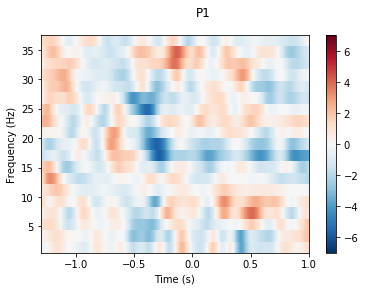

Frontal Chs:
No baseline correction applied


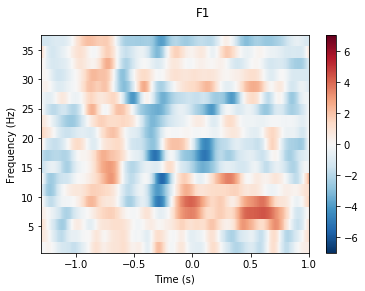





PLOTTING SUB 223
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


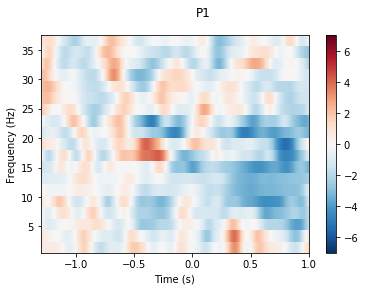

Frontal Chs:
No baseline correction applied


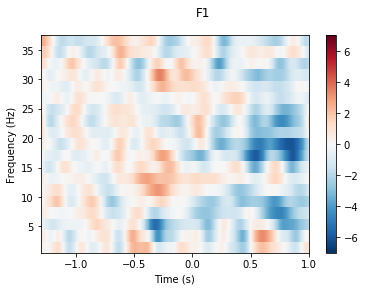





PLOTTING SUB 197
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


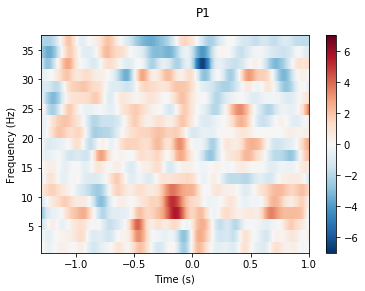

Frontal Chs:
No baseline correction applied


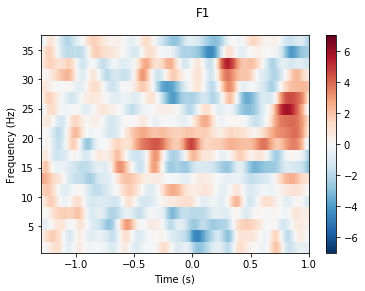





PLOTTING SUB 228
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


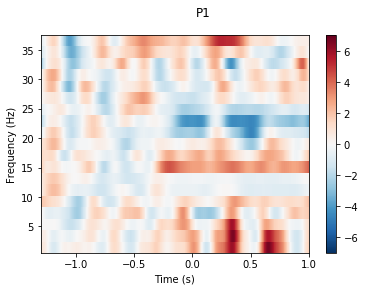

Frontal Chs:
No baseline correction applied


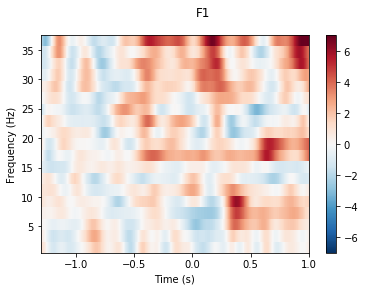

In [96]:
for s in list_subs:
    print('\n\n\n')
    thisSub=preproc_cue_eps[s]
    print('PLOTTING SUB %s' %s)
    tfr_disLongCue=mne.time_frequency.tfr_morlet(thisSub['disLongCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
    tfr_neutLongCue=mne.time_frequency.tfr_morlet(thisSub['neutLongCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
    tfr_neutLongCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    tfr_disLongCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    
    disMinusNeut_longCue=tfr_disLongCue-tfr_neutLongCue
    print('Posterior Chs:')
    disMinusNeut_longCue.plot(vmin=-7,vmax=7,picks=['P1','Pz','P2','P3','P4','PO3','PO4','POz'])
    print('Frontal Chs:')
    disMinusNeut_longCue.plot(vmin=-7,vmax=7,picks=['F1','Fz','F2','FC1','FCz','FC2'])

## [ Target, Long SOA Cue] - [neutral, long SOA cue]





PLOTTING SUB 224
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


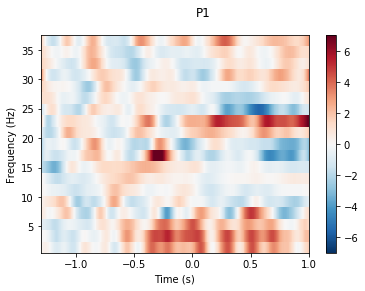

Frontal Chs:
No baseline correction applied


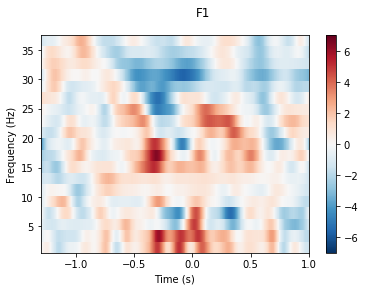





PLOTTING SUB 214
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


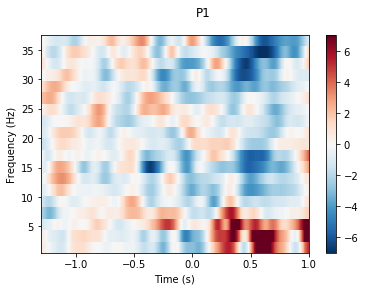

Frontal Chs:
No baseline correction applied


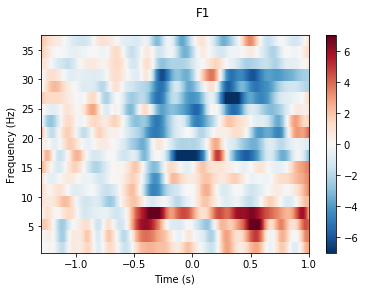





PLOTTING SUB 211
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


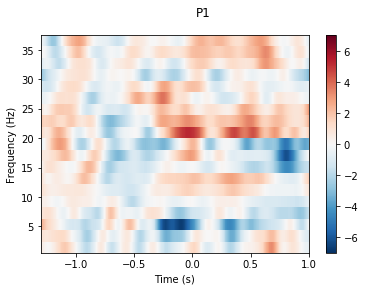

Frontal Chs:
No baseline correction applied


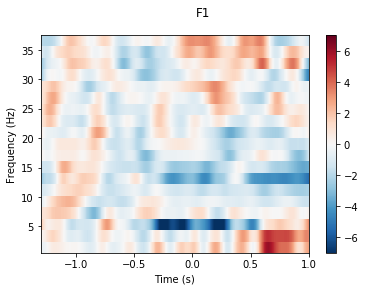





PLOTTING SUB 206
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


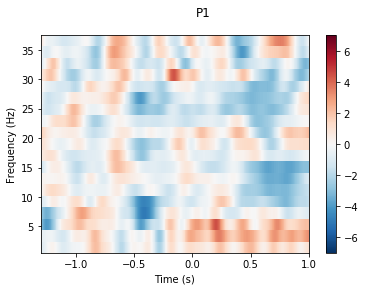

Frontal Chs:
No baseline correction applied


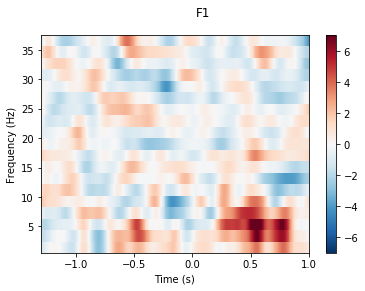





PLOTTING SUB 225
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


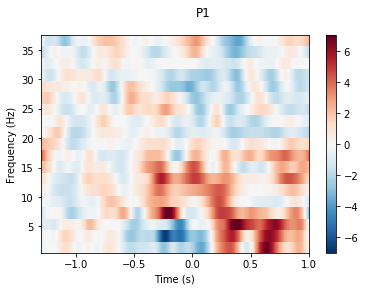

Frontal Chs:
No baseline correction applied


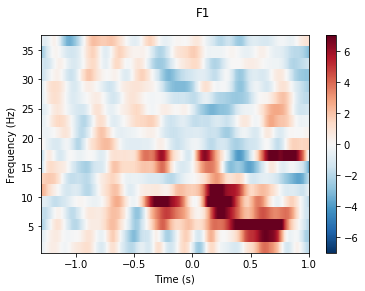





PLOTTING SUB 226
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


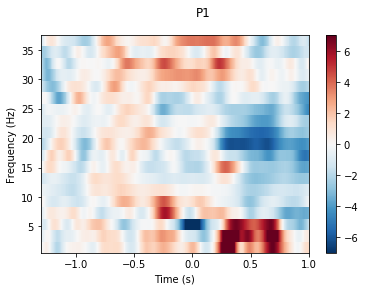

Frontal Chs:
No baseline correction applied


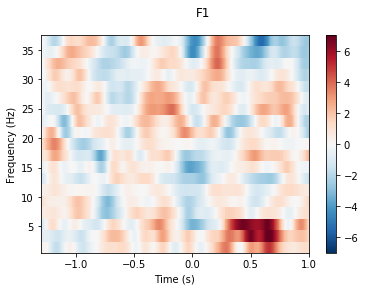





PLOTTING SUB 233
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


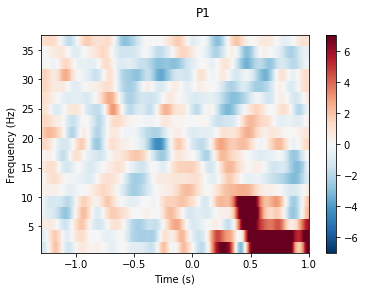

Frontal Chs:
No baseline correction applied


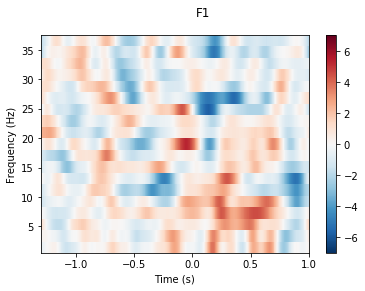





PLOTTING SUB 223
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


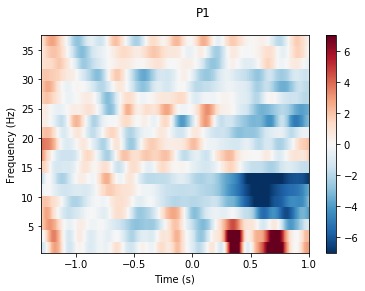

Frontal Chs:
No baseline correction applied


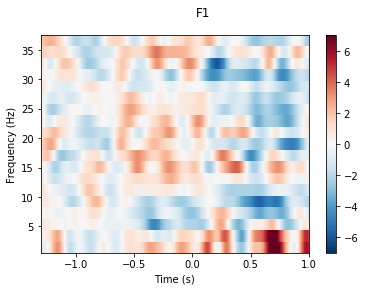





PLOTTING SUB 197
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


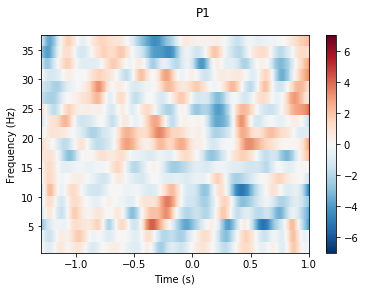

Frontal Chs:
No baseline correction applied


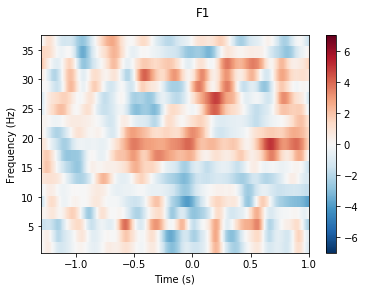





PLOTTING SUB 228
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


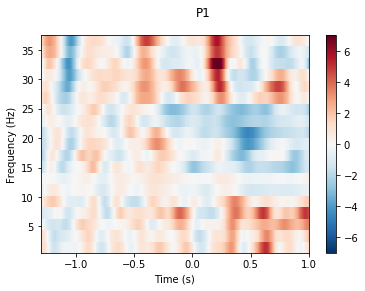

Frontal Chs:
No baseline correction applied


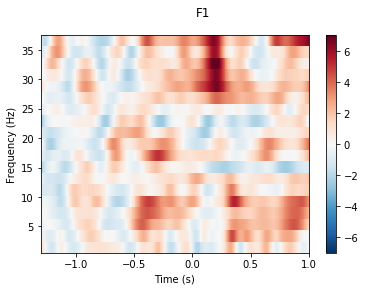

In [97]:
for s in list_subs:
    print('\n\n\n')
    thisSub=preproc_cue_eps[s]
    print('PLOTTING SUB %s' %s)
    tfr_tarLongCue=mne.time_frequency.tfr_morlet(thisSub['tarLongCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
    tfr_neutLongCue=mne.time_frequency.tfr_morlet(thisSub['neutLongCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
    tfr_neutLongCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    tfr_tarLongCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    
    tarMinusNeut_longCue=tfr_tarLongCue-tfr_neutLongCue
    print('Posterior Chs:')
    tarMinusNeut_longCue.plot(vmin=-7,vmax=7,picks=['P1','Pz','P2','P3','P4','PO3','PO4','POz'])
    print('Frontal Chs:')
    tarMinusNeut_longCue.plot(vmin=-7,vmax=7,picks=['F1','Fz','F2','FC1','FCz','FC2'])

## [Dis, short SOA cue] - [neutral, short SOA cue]





PLOTTING SUB 224
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


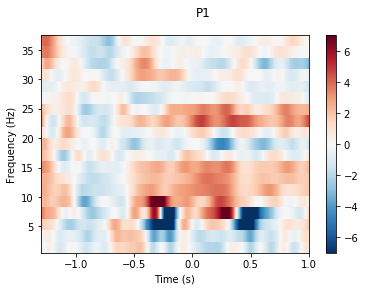

Frontal Chs:
No baseline correction applied


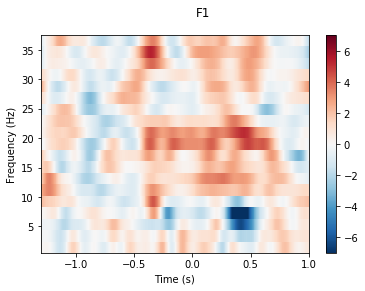





PLOTTING SUB 214
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


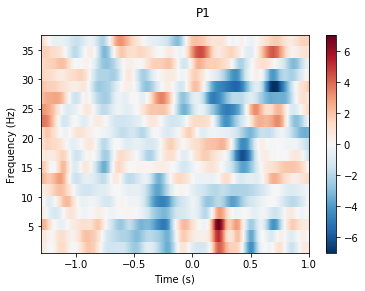

Frontal Chs:
No baseline correction applied


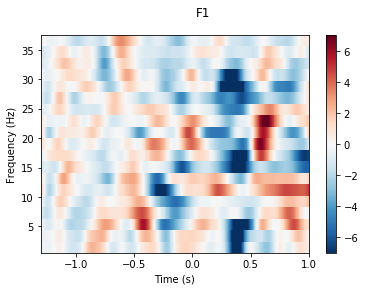





PLOTTING SUB 211
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


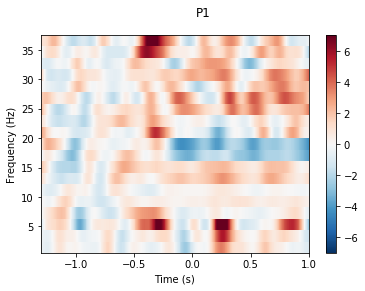

Frontal Chs:
No baseline correction applied


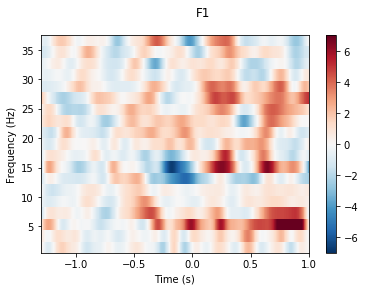





PLOTTING SUB 206
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


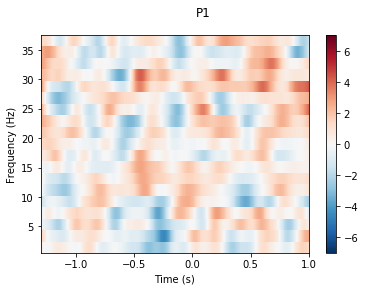

Frontal Chs:
No baseline correction applied


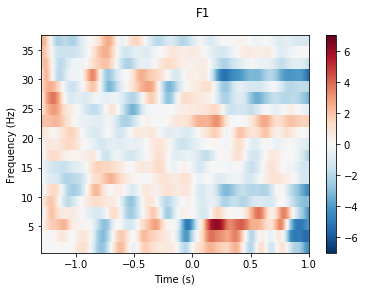





PLOTTING SUB 225
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


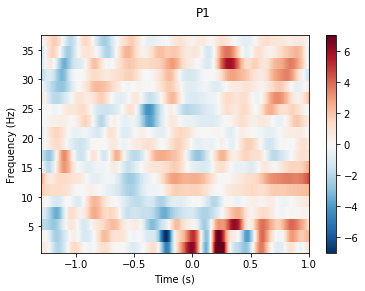

Frontal Chs:
No baseline correction applied


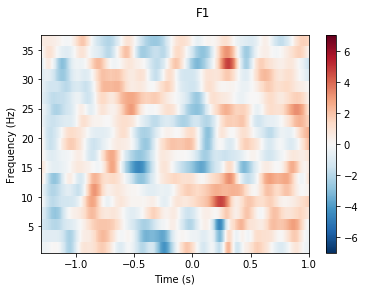





PLOTTING SUB 226
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


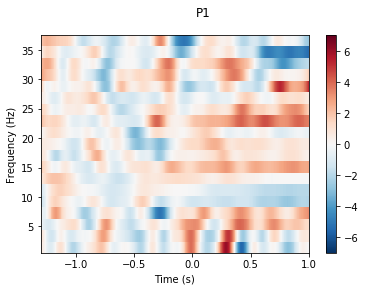

Frontal Chs:
No baseline correction applied


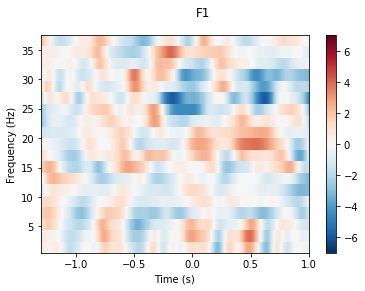





PLOTTING SUB 233
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


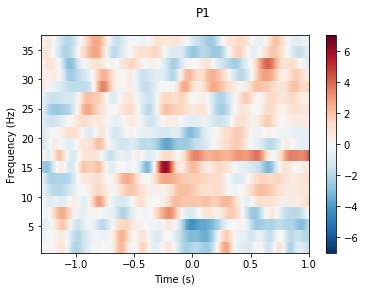

Frontal Chs:
No baseline correction applied


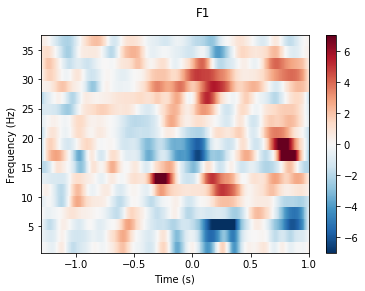





PLOTTING SUB 223
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


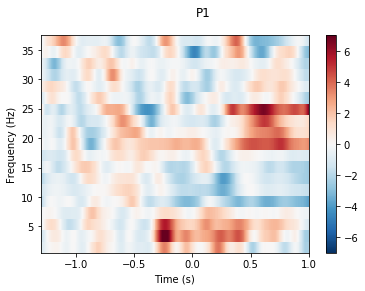

Frontal Chs:
No baseline correction applied


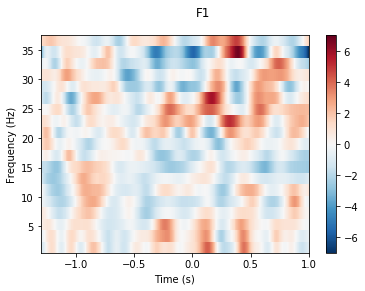





PLOTTING SUB 197
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


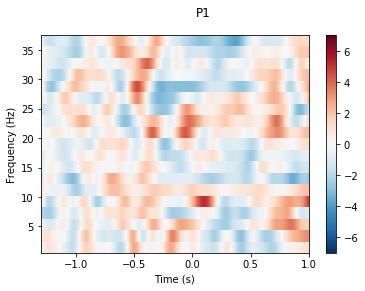

Frontal Chs:
No baseline correction applied


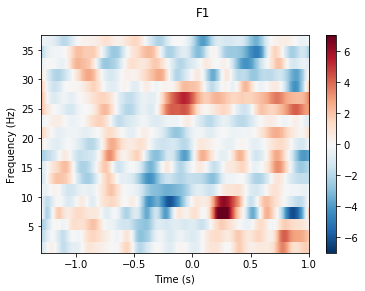





PLOTTING SUB 228
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


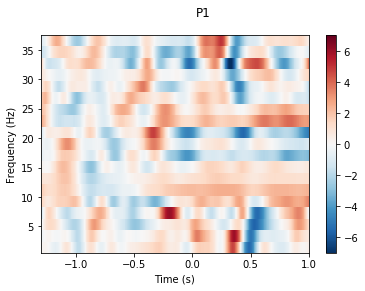

Frontal Chs:
No baseline correction applied


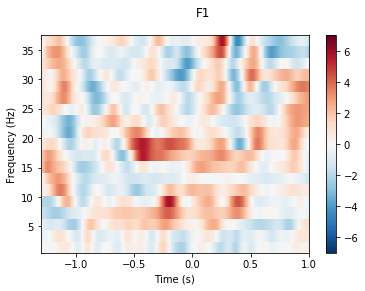

In [104]:
for s in list_subs:
    print('\n\n\n')
    thisSub=preproc_cue_eps[s]
    print('PLOTTING SUB %s' %s)
    tfr_disShortCue=mne.time_frequency.tfr_morlet(thisSub['disShortCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
    tfr_neutShortCue=mne.time_frequency.tfr_morlet(thisSub['neutShortCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
    tfr_neutShortCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    tfr_disShortCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    
    disMinusNeut_shortCue=tfr_disShortCue-tfr_neutShortCue
    print('Posterior Chs:')
    disMinusNeut_shortCue.plot(vmin=-7,vmax=7,picks=['P1','Pz','P2','P3','P4','PO3','PO4','POz'])
    print('Frontal Chs:')
    disMinusNeut_shortCue.plot(vmin=-7,vmax=7,picks=['F1','Fz','F2','FC1','FCz','FC2'])

## [Tar short SOA] - [neut short SOA]





PLOTTING SUB 224
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


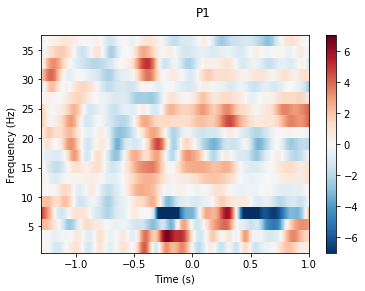

Frontal Chs:
No baseline correction applied


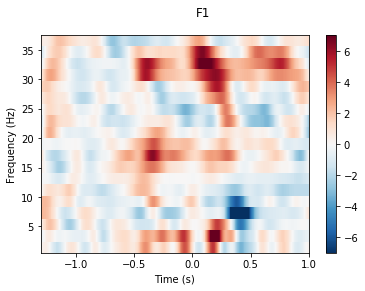





PLOTTING SUB 214
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


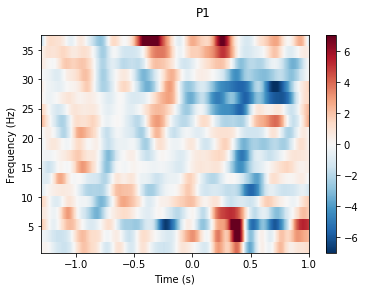

Frontal Chs:
No baseline correction applied


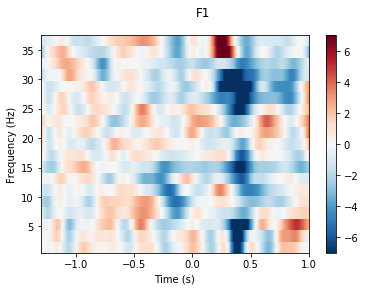





PLOTTING SUB 211
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


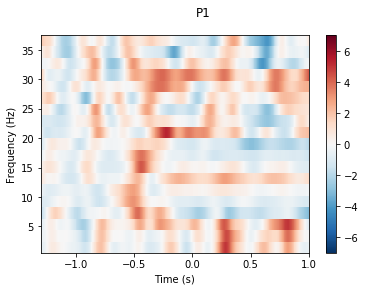

Frontal Chs:
No baseline correction applied


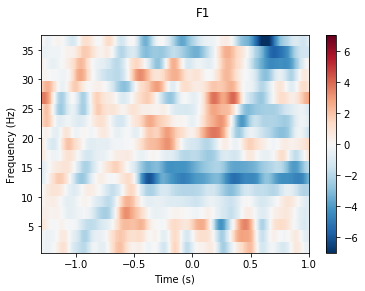





PLOTTING SUB 206
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


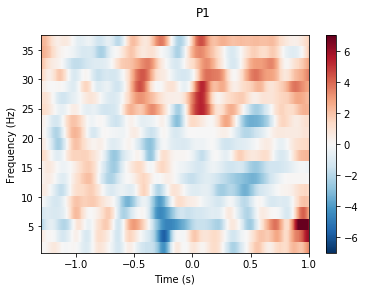

Frontal Chs:
No baseline correction applied


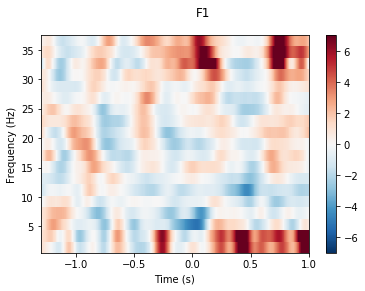





PLOTTING SUB 225
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


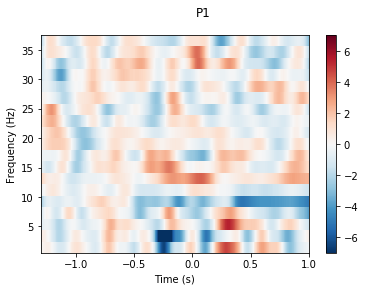

Frontal Chs:
No baseline correction applied


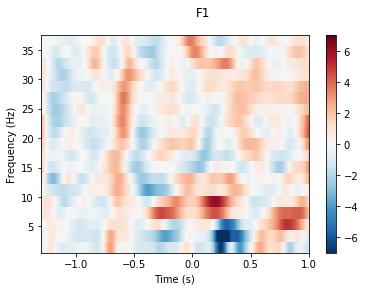





PLOTTING SUB 226
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


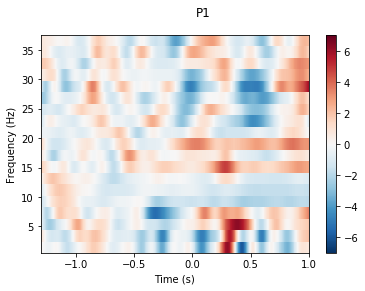

Frontal Chs:
No baseline correction applied


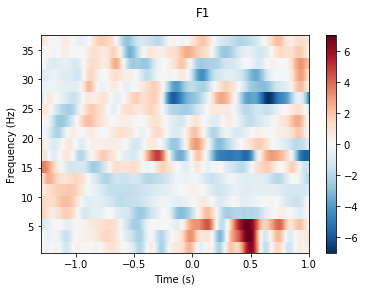





PLOTTING SUB 233
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


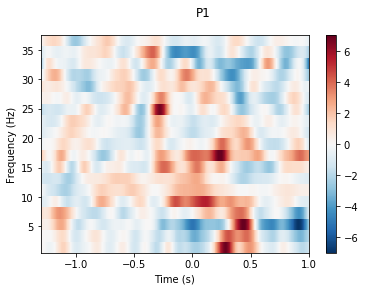

Frontal Chs:
No baseline correction applied


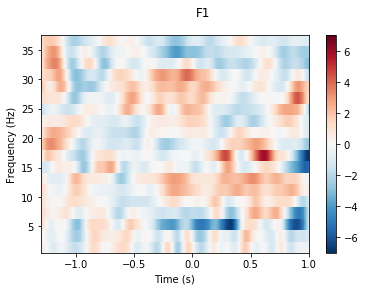





PLOTTING SUB 223
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


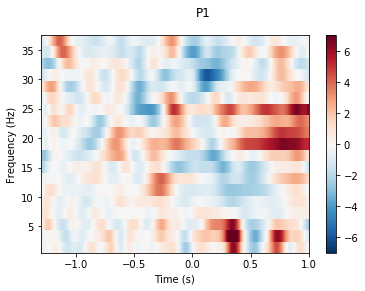

Frontal Chs:
No baseline correction applied


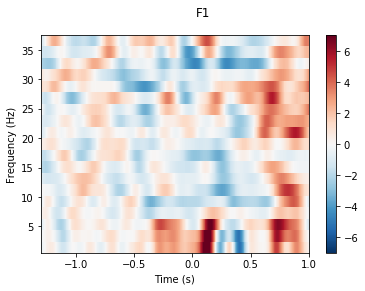





PLOTTING SUB 197
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


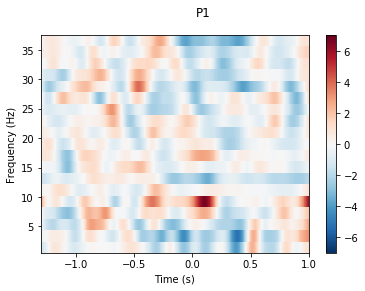

Frontal Chs:
No baseline correction applied


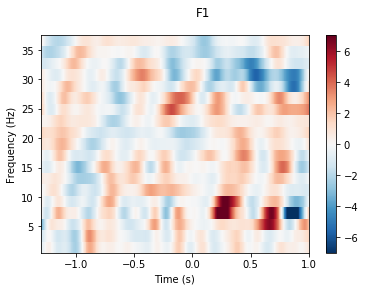





PLOTTING SUB 228
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


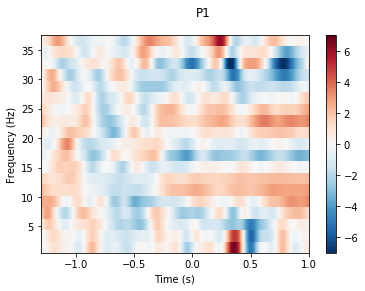

Frontal Chs:
No baseline correction applied


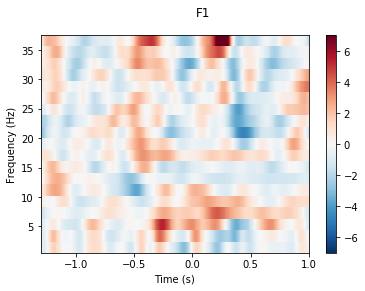

In [105]:
for s in list_subs:
    print('\n\n\n')
    thisSub=preproc_cue_eps[s]
    print('PLOTTING SUB %s' %s)
    tfr_tarShortCue=mne.time_frequency.tfr_morlet(thisSub['tarShortCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
    tfr_neutShortCue=mne.time_frequency.tfr_morlet(thisSub['neutShortCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
    tfr_neutShortCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    tfr_tarShortCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    
    tarMinusNeut_shortCue=tfr_tarShortCue-tfr_neutShortCue
    print('Posterior Chs:')
    tarMinusNeut_shortCue.plot(vmin=-7,vmax=7,picks=['P1','Pz','P2','P3','P4','PO3','PO4','POz'])
    print('Frontal Chs:')
    tarMinusNeut_shortCue.plot(vmin=-7,vmax=7,picks=['F1','Fz','F2','FC1','FCz','FC2'])

# Avg over subs

In [137]:
all_conds=['tarShortCue_trig','disShortCue_trig','neutShortCue_trig',
           'tarLongCue_trig','disLongCue_trig','neutLongCue_trig']
all_subs_Cues={}


for cond in all_conds:  
    skeleton_obj=mne.time_frequency.tfr_morlet(preproc_cue_eps['228'][cond],freqs=freqs,n_cycles=n_cycles,
                                               average=True,use_fft=True,return_itc=False, decim=2, n_jobs=1)
    thisCond_allSubsDat=[]
    for s in list_subs:
        #print('\n\n\n')
        thisSub=preproc_cue_eps[s]
        print('extracting sub %s' %s)
        subDat=mne.time_frequency.tfr_morlet(thisSub[cond],freqs=freqs,n_cycles=n_cycles,average=True,
                                                 use_fft=True,return_itc=False, decim=2, n_jobs=1)
        thisCond_allSubsDat.append(subDat.data)

    all_subs_thisCond=np.stack(thisCond_allSubsDat)
    all_subs_thisCond=all_subs_thisCond.mean(axis=0)
    skeleton_obj.data=all_subs_thisCond
    
    skeleton_obj.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    all_subs_Cues[cond]=skeleton_obj



extracting sub 224
extracting sub 214
extracting sub 211
extracting sub 206
extracting sub 225
extracting sub 226
extracting sub 233
extracting sub 223
extracting sub 197
extracting sub 228
Applying baseline correction (mode: zscore)
extracting sub 224
extracting sub 214
extracting sub 211
extracting sub 206
extracting sub 225
extracting sub 226
extracting sub 233
extracting sub 223
extracting sub 197
extracting sub 228
Applying baseline correction (mode: zscore)
extracting sub 224
extracting sub 214
extracting sub 211
extracting sub 206
extracting sub 225
extracting sub 226
extracting sub 233
extracting sub 223
extracting sub 197
extracting sub 228
Applying baseline correction (mode: zscore)
extracting sub 224
extracting sub 214
extracting sub 211
extracting sub 206
extracting sub 225
extracting sub 226
extracting sub 233
extracting sub 223
extracting sub 197
extracting sub 228
Applying baseline correction (mode: zscore)
extracting sub 224
extracting sub 214
extracting sub 211
extract

## target Long SOA - neutral Long SOA

Posterior Chs:
No baseline correction applied


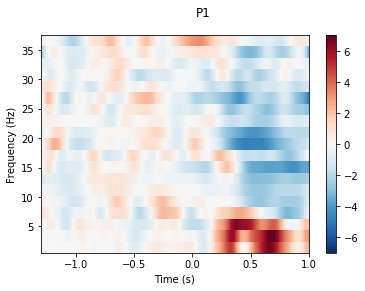

Frontal Chs:
No baseline correction applied


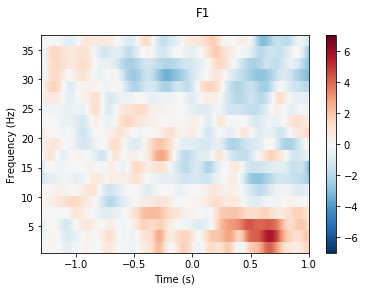

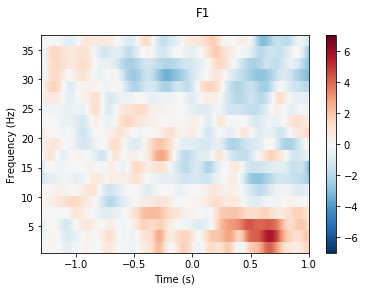

In [140]:
tarMinusneut_Long=all_subs_Cues['tarLongCue_trig']-all_subs_Cues['neutLongCue_trig']

print('Posterior Chs:')
tarMinusneut_Long.plot(vmin=-7,vmax=7,picks=['P1','Pz','P2','P3','P4','PO3','PO4','POz'])
print('Frontal Chs:')
tarMinusneut_Long.plot(vmin=-7,vmax=7,picks=['F1','Fz','F2','FC1','FCz','FC2'])

## dis Long SOA - neutral Long SOA

Posterior Chs:
No baseline correction applied


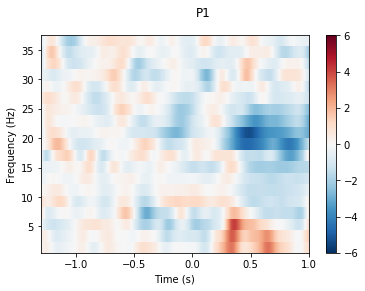

Frontal Chs:
No baseline correction applied


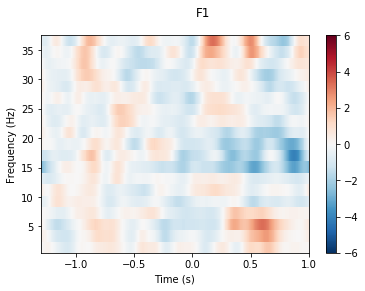

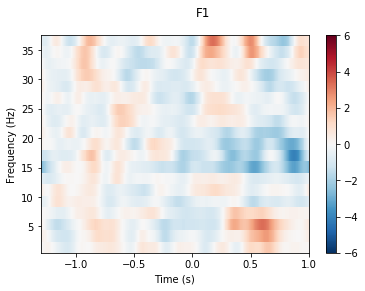

In [142]:
disMinusneut_Long=all_subs_Cues['disLongCue_trig']-all_subs_Cues['neutLongCue_trig']

print('Posterior Chs:')
disMinusneut_Long.plot(vmin=-6,vmax=6,picks=['P1','Pz','P2','P3','P4','PO3','PO4','POz'])
print('Frontal Chs:')
disMinusneut_Long.plot(vmin=-6,vmax=6,picks=['F1','Fz','F2','FC1','FCz','FC2'])

## tar Short SOA - neutral Short SOA

Posterior Chs:
No baseline correction applied


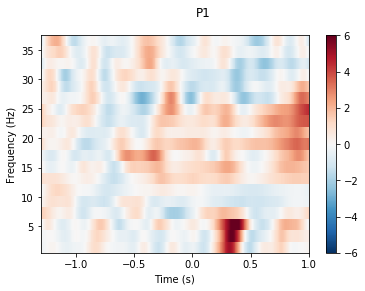

Frontal Chs:
No baseline correction applied


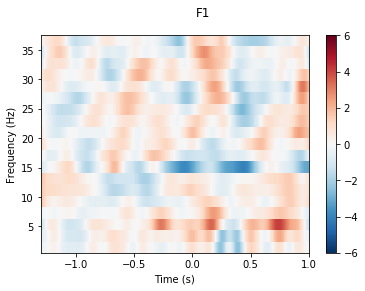

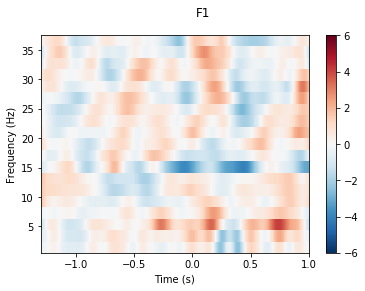

In [144]:
tarMinusneut_Short=all_subs_Cues['tarShortCue_trig']-all_subs_Cues['neutShortCue_trig']

print('Posterior Chs:')
tarMinusneut_Short.plot(vmin=-6,vmax=6,picks=['P1','Pz','P2','P3','P4','PO3','PO4','POz'])
print('Frontal Chs:')
tarMinusneut_Short.plot(vmin=-6,vmax=6,picks=['F1','Fz','F2','FC1','FCz','FC2'])

## dis Short SOA - neutral Short SOA

Posterior Chs:
No baseline correction applied


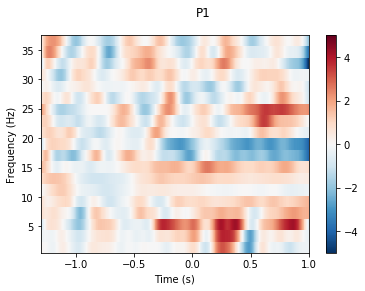

Frontal Chs:
No baseline correction applied


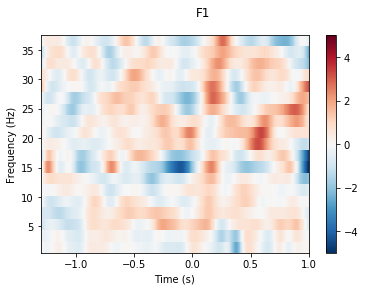

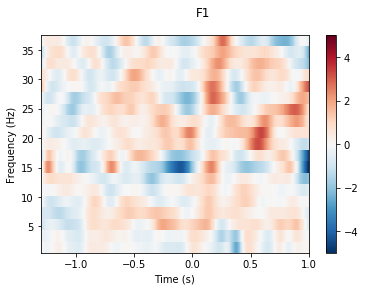

In [146]:
disMinusneut_Short=all_subs_Cues['disShortCue_trig']-all_subs_Cues['neutShortCue_trig']

print('Posterior Chs:')
disMinusneut_Short.plot(vmin=-5,vmax=5,picks=['P1','Pz','P2','P3','P4','PO3','PO4','POz'])
print('Frontal Chs:')
disMinusneut_Short.plot(vmin=-5,vmax=5,picks=['F1','Fz','F2','FC1','FCz','FC2'])